# Model Struct

In [1]:
import fastflow
import torch
device = "cuda:2" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))


Using cuda:2 device


In [2]:
fastflow

<module 'fastflow' from '/root/project/wood/ort/trt/research/wdcv/demo/anomaly_detection/FastFlow/fastflow.py'>

In [3]:
model = fastflow.FastFlow(
    backbone_name="resnet18",
    flow_steps=8,
    input_size=256,
    conv3x3_only=True,
    hidden_ratio=1.0,
)

In [4]:
model.to(device)

FastFlow(
  (feature_extractor): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

## backbone：特征提取

backbone 充当特征提取器，不需要训练，不需要更新参数 requires_grad==false

In [5]:
X = torch.rand(size = (32, 3, 256, 256), dtype=torch.float32).to(device)

for name, layer in model.feature_extractor._modules.items():
    # print(f"@@ name: {name}, layer: {layer}, X: {X.shape}")
    print(f"@@ name: {name}, X: {X.shape}")
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

@@ name: conv1, X: torch.Size([32, 3, 256, 256])
Conv2d output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: bn1, X: torch.Size([32, 64, 128, 128])
BatchNorm2d output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: act1, X: torch.Size([32, 64, 128, 128])
ReLU output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: maxpool, X: torch.Size([32, 64, 128, 128])
MaxPool2d output shape: 	 torch.Size([32, 64, 64, 64])
@@ name: layer1, X: torch.Size([32, 64, 64, 64])
Sequential output shape: 	 torch.Size([32, 64, 64, 64])
@@ name: layer2, X: torch.Size([32, 64, 64, 64])
Sequential output shape: 	 torch.Size([32, 128, 32, 32])
@@ name: layer3, X: torch.Size([32, 128, 32, 32])
Sequential output shape: 	 torch.Size([32, 256, 16, 16])


In [6]:
import timm
feature_extractor = timm.create_model(
                "resnet18",
                pretrained=True,
                features_only=True,
                out_indices=[1, 2, 3],
            )

In [7]:
print(feature_extractor)

FeatureListNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [8]:
feature_extractor = feature_extractor.to(device)
X = torch.rand(size = (32, 3, 256, 256), dtype=torch.float32).to(device)

for name, layer in feature_extractor._modules.items():
    print(f"@@ name: {name}, X: {X.shape}")
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

@@ name: conv1, X: torch.Size([32, 3, 256, 256])
Conv2d output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: bn1, X: torch.Size([32, 64, 128, 128])
BatchNorm2d output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: act1, X: torch.Size([32, 64, 128, 128])
ReLU output shape: 	 torch.Size([32, 64, 128, 128])
@@ name: maxpool, X: torch.Size([32, 64, 128, 128])
MaxPool2d output shape: 	 torch.Size([32, 64, 64, 64])
@@ name: layer1, X: torch.Size([32, 64, 64, 64])
Sequential output shape: 	 torch.Size([32, 64, 64, 64])
@@ name: layer2, X: torch.Size([32, 64, 64, 64])
Sequential output shape: 	 torch.Size([32, 128, 32, 32])
@@ name: layer3, X: torch.Size([32, 128, 32, 32])
Sequential output shape: 	 torch.Size([32, 256, 16, 16])


In [9]:
channels = feature_extractor.feature_info.channels()
print(f"channels: {channels}")
scales = feature_extractor.feature_info.reduction()
print(f"scales: {scales}")

channels: [64, 128, 256]
scales: [4, 8, 16]


### norms 
对于 resnet，norms 是可训练的 LayerNorm

### LayerNorm
Pytorch LayerNorm: https://blog.csdn.net/weixin_39228381/article/details/107939602

BatchNorm与LayerNorm的异同: https://zhuanlan.zhihu.com/p/428620330

In [10]:
import torch.nn as nn
import torch.nn.functional as F

input_size = 256
# 对于 resnet，self.norms 是可训练的 LayerNorm
norms = nn.ModuleList()
print(norms)
for in_channels, scale in zip(channels, scales):
    print(f"in_channels: {in_channels}, scale: {scale}")
    norms.append(
        nn.LayerNorm(
            [in_channels, int(input_size / scale), int(input_size / scale)], 
            elementwise_affine=True,
        ) 
    )
print(f"after norms: {norms}")

ModuleList()
in_channels: 64, scale: 4
in_channels: 128, scale: 8
in_channels: 256, scale: 16
after norms: ModuleList(
  (0): LayerNorm((64, 64, 64), eps=1e-05, elementwise_affine=True)
  (1): LayerNorm((128, 32, 32), eps=1e-05, elementwise_affine=True)
  (2): LayerNorm((256, 16, 16), eps=1e-05, elementwise_affine=True)
)


In [11]:
for param in feature_extractor.parameters():
    param.requires_grad = False

### forward

In [12]:
X = torch.rand(size = (32, 3, 256, 256), dtype=torch.float32).to(device)
feature_extractor = feature_extractor.eval()
features = feature_extractor(X)
print(f"features: {len(features)}, {features[0].shape}, {features[1].shape}, {features[2].shape}")
norms = norms.to(device)
print(f"norms: {norms}")

# norms
features = [norms[i](feature) for i, feature in enumerate(features)]
# fe = []
# for i, feature in enumerate(features):
#     print(f"i: {i}, feature: {feature.shape}")
#     temp = norms[i](feature)
#     print(f"temp: {temp.shape}")

features: 3, torch.Size([32, 64, 64, 64]), torch.Size([32, 128, 32, 32]), torch.Size([32, 256, 16, 16])
norms: ModuleList(
  (0): LayerNorm((64, 64, 64), eps=1e-05, elementwise_affine=True)
  (1): LayerNorm((128, 32, 32), eps=1e-05, elementwise_affine=True)
  (2): LayerNorm((256, 16, 16), eps=1e-05, elementwise_affine=True)
)


## flows 模块

pytorch 网络结构解析：
https://blog.csdn.net/hxxjxw/article/details/107734140

https://zhuanlan.zhihu.com/p/448011103

In [60]:
nf_flows = nn.ModuleList()

In [61]:
import FrEIA.framework as Ff
import FrEIA.modules as Fm

def subnet_conv_func(kernel_size, hidden_ratio):
    def subnet_conv(in_channels, out_channels):
        hidden_channels = int(in_channels * hidden_ratio)
        return nn.Sequential(
            nn.Conv2d(in_channels, hidden_channels, kernel_size, padding="same"),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, out_channels, kernel_size, padding="same"),
        )

    return subnet_conv

def nf_fast_flow(input_chw, conv3x3_only, hidden_ratio, flow_steps, clamp=2.0):
    nodes = Ff.SequenceINN(*input_chw)
    for i in range(flow_steps):
        if i % 2 == 1 and not conv3x3_only:
            kernel_size = 1
        else:
            kernel_size = 3
        nodes.append(
            Fm.AllInOneBlock,
            subnet_constructor=subnet_conv_func(kernel_size, hidden_ratio),
            affine_clamping=clamp,
            permute_soft=False,
        )
    return nodes

In [62]:
conv3x3_only = False
hidden_ratio = 1.0
flow_steps = 8

for in_channels, scale in zip(channels, scales):
    nf_flows.append(
        nf_fast_flow(
            [in_channels, int(input_size / scale), int(input_size / scale)], # [768, 16, 16]
            conv3x3_only=conv3x3_only,
            hidden_ratio=hidden_ratio,
            flow_steps=flow_steps,
        )
    )

In [63]:
print(nf_flows)

ModuleList(
  (0): SequenceINN(
    (module_list): ModuleList(
      (0): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
        (subnet): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        )
      )
      (1): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
        (subnet): Sequential(
          (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
        )
      )
      (2): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
        (subnet): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        )
      )
      (3): AllIn

In [57]:
X1 = torch.rand(size = (32, 64, 64, 64), dtype=torch.float32).to(device)
X2 = torch.rand(size = (32, 128, 32, 32), dtype=torch.float32).to(device)
X3 = torch.rand(size = (32, 256, 16, 16), dtype=torch.float32).to(device)

nf_flows_one = nf_flows[0].to(device)
X1, _ = nf_flows_one(X1)
print(f"X1: {X1.shape}, \n {_}")

nf_flows_two =  nf_flows[1].to(device)
X2, _ = nf_flows_two(X2)
print(f"X2: {X2.shape}, \n {_}")

nf_flows_three =  nf_flows[2].to(device)
X3,_ = nf_flows_three(X3)
print(f"X3: {X3.shape}, \n {_}")

# print(nf_flows_two)
# print(nf_flows_two.modules())
# model_modules = [x for x in nf_flows_two.modules()]
# print(model_modules)


X1: torch.Size([32, 64, 64, 64]), 
 tensor([3928.0762, 3934.5725, 3934.5757, 3910.5762, 3898.6094, 3947.3840,
        3917.0845, 3935.8203, 3904.4421, 3914.0430, 3931.2612, 3919.1550,
        3906.4424, 3938.1455, 3919.1306, 3920.9617, 3923.2271, 3901.5483,
        3939.3652, 3910.0681, 3919.4487, 3929.3357, 3919.4856, 3909.6033,
        3914.6418, 3938.1785, 3935.5178, 3917.1963, 3943.1675, 3922.4468,
        3925.0583, 3927.7769], device='cuda:2', grad_fn=<AddBackward0>)
X2: torch.Size([32, 128, 32, 32]), 
 tensor([493.1341, 490.2305, 492.5671, 508.2561, 506.9001, 500.0766, 524.6436,
        493.1770, 511.7162, 508.5134, 495.2982, 496.2484, 492.0012, 498.4301,
        498.3500, 507.9825, 498.3142, 489.6389, 507.3504, 504.7838, 513.4261,
        496.3504, 509.3570, 504.8654, 506.7211, 512.7775, 503.7800, 495.3903,
        516.8751, 508.0291, 504.3040, 492.5903], device='cuda:2',
       grad_fn=<AddBackward0>)
X3: torch.Size([32, 256, 16, 16]), 
 tensor([-106.7309,  -99.4501,  -95.3808

### forward

In [19]:
loss = 0
outputs = []

nf_flows = nf_flows.to(device)
for i, feature in enumerate(features):
    print(f"## i: {i}, feature: {feature.shape}")
    # print(f"{nf_flows[i]}")
    output, log_jac_dets = nf_flows[i](feature)
    # print(f"output:{output}")
    print(f"output: {output.shape}, log_jac_dets: {log_jac_dets.shape}")
    out_sum = torch.sum(output**2, dim=(1, 2, 3))
    # output:
    # log_jac_dets:
    print(f"out_sum: {0.5* out_sum} \n log_jac_dets: {log_jac_dets}")
    loss += torch.mean(
        0.5 * torch.sum(output**2, dim=(1, 2, 3)) - log_jac_dets
    )
    print(f"loss: {loss}")

## i: 0, feature: torch.Size([32, 64, 64, 64])
output: torch.Size([32, 64, 64, 64]), log_jac_dets: torch.Size([32])
out_sum: tensor([131953.5000, 131973.6406, 131914.7812, 132039.9375, 132001.7188,
        131991.1094, 131978.5000, 132083.7031, 131929.1562, 131926.4844,
        131949.4688, 132014.7500, 131919.0000, 132024.9531, 131949.8125,
        132062.1250, 131917.4375, 131972.7656, 132004.9688, 132089.2500,
        132095.0469, 131926.3750, 131917.4688, 132001.9375, 132052.9688,
        132022.6406, 132011.4375, 131971.0625, 132027.4375, 131923.6562,
        131841.1406, 131955.2812], device='cuda:2', grad_fn=<MulBackward0>) 
 log_jac_dets: tensor([-886.8148, -859.9922, -869.7710, -851.5143, -870.9393, -865.7727,
        -892.1818, -879.9391, -879.6431, -882.8421, -896.1637, -876.7573,
        -890.7874, -858.4618, -896.0576, -860.5729, -868.0703, -866.9240,
        -876.7052, -891.5291, -862.3875, -887.8175, -861.6735, -889.7319,
        -872.1165, -893.6196, -866.3461, -906.730

## FrEIA.framework 与 FrEIA.modules
https://github.com/vislearn/FrEIA

FrEIA:  Framework for Easily Invertible Architectures 易于可逆架构的框架

    1、Construct Invertible Neural Networks (INNs) from simple invertible building blocks.
        从简单的可逆构建块构建可逆神经网络 (INN)
    2、Quickly construct complex invertible computation graphs and INN topologies.
        快速构建复杂的可逆计算图和 INN 拓扑
    3、Forward and inverse computation guaranteed to work automatically.
        正向和反向计算保证自动工作
    4、Most common invertible transforms and operations are provided.
        提供了最常见的可逆变换和操作
    5、Easily add your own invertible transforms.
        轻松添加您自己的可逆变换

### 3x3 flow

      (0): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
        (subnet): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (1): ReLU()
          (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        )
      )
      
 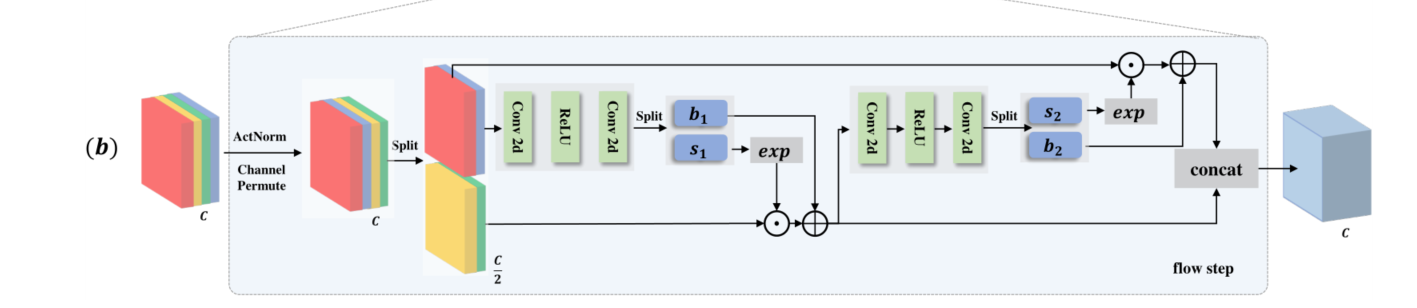

### INN
可逆神经网络

    1、Stochastic gradient descent will not work (well) for INNs. Use e.g. Adam instead.
        随机梯度下降（SGD）对 INN 不起作用（很好）。使用例如取而代之的是 Adam。

### FrEIA.framework.SequenceINN(*dims: int, force_tuple_output=False)

仅支持一系列连续的模块（不支持拆分、合并、分支）。有一个 append() 方法，以比 GraphINN 的基于计算图的方法更简单的方式添加新块。

### 可逆运算


#### 耦合快

#### 定义自定义可逆操作 Defining custom invertible operations 



### Example

## 损失函数：负对数似然
https://www.jianshu.com/p/61cf7f2ac53f

### 似然
似然(likelihood)和概率(probability)。概率是一个事件发生的可能性，而似然指的是影响概率的未知参数。也就是说，概率是在该未知参数已知的情况下所得到的结果；而似然是该参数未知，我们需要根据观察结果，来估计概率模型的参数。


### 对数似然

最大似然估计的一般步骤如下：

    (1) 写出似然函数;
    (2) 对似然函数取对数,得到对数似然函数;
    (3) 求对数似然函数的关于参数组的偏导数,并令其为0,得到似然方程组;
    (4) 解似然方程组,得到参数组的值。

### 负对数似然
我们期望似然估计越大越好，取完负号之后就是负对数似然越小越好，因此负对数似然函数可以作为损失函数。

## AUROC

AUROC（Area Under the Receiver Operating Characteristic Curve）是一种用于评估二分类模型性能的指标。ROC 曲线是一种图形工具，它显示了在不同阈值下真正例率（True Positive Rate，也称为敏感性）与假正例率（False Positive Rate）之间的权衡。

ROC 曲线的 x 轴是假正例率（FPR），y 轴是真正例率（TPR），其计算公式为：

ROC 曲线下的面积即为 AUROC，该值越接近1表示模型性能越好，越接近0.5表示性能越差（随机猜测的模型）。

In [9]:
from ignite.contrib import metrics
from ignite.engine import create_supervised_evaluator
from ignite.contrib.metrics import ROC_AUC